In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("Datasets/Cars.csv")

In [3]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [6]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [7]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


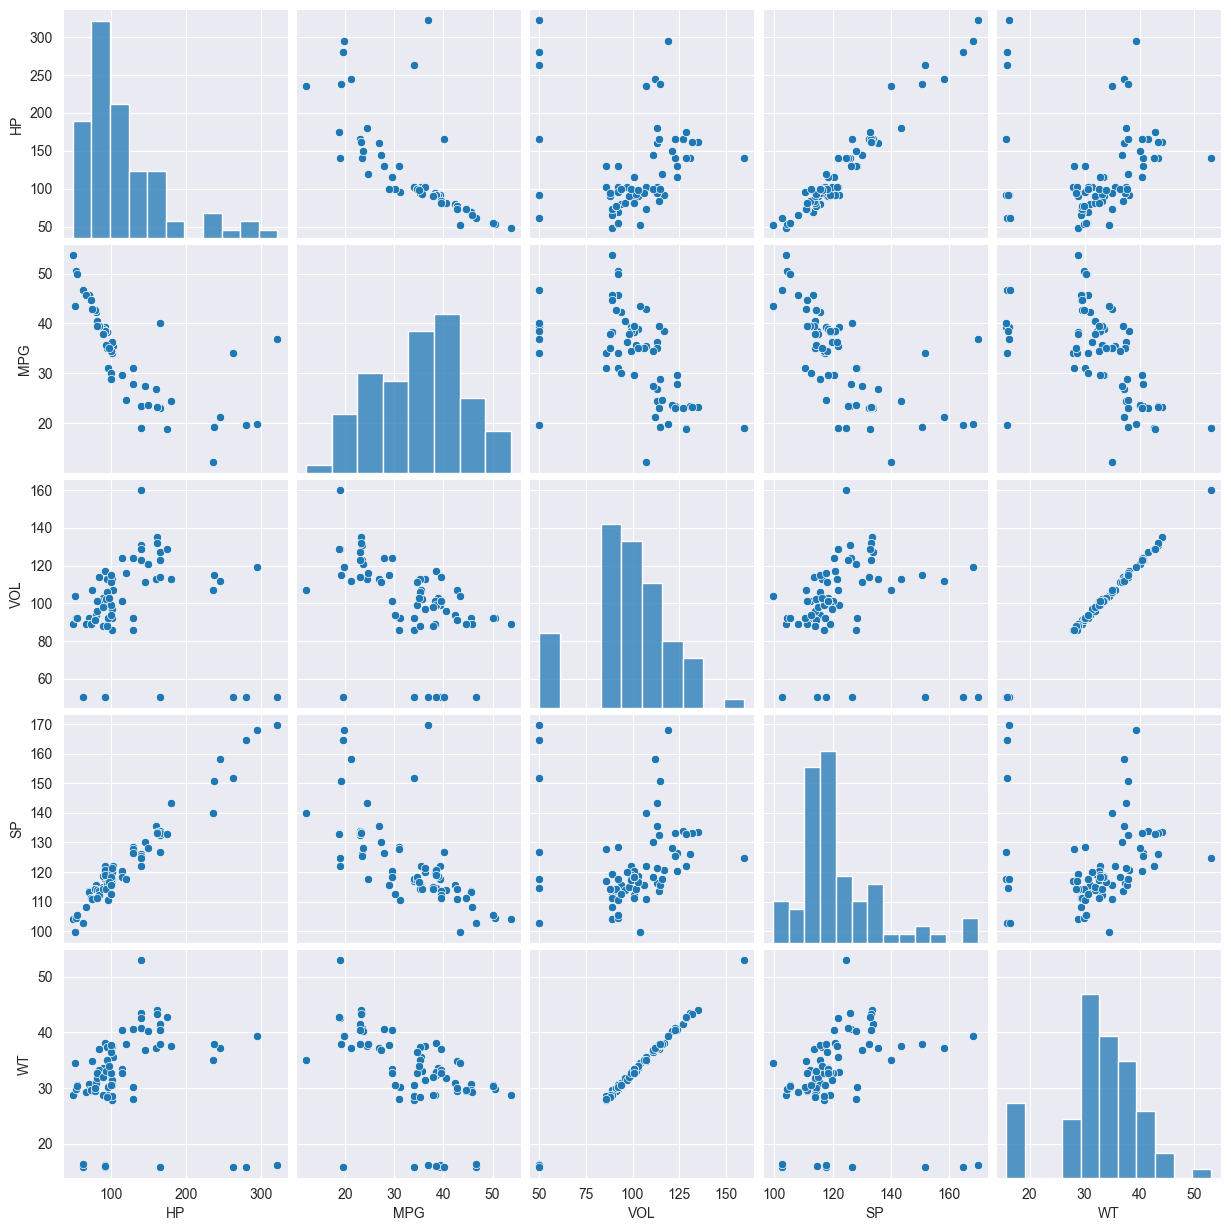

In [8]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [9]:
# Preparing the Model
model = smf.ols('MPG~WT+SP+VOL+HP', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           1.54e-23
Time:                        23:04:02   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# MPG = Intercept + X1 (WT) + X2 (SP) + X3 (VOL) + X4 (HP)
model.params

Intercept    30.677336
WT            0.400574
SP            0.395627
VOL          -0.336051
HP           -0.205444
dtype: float64

In [11]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
SP           2.499880
VOL         -0.590970
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
SP           0.014579
VOL          0.556294
HP           0.000001
dtype: float64


### Simple Linear Regression Models

In [12]:
ml_v = smf.ols('MPG~VOL', data=df).fit()

In [13]:
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [14]:
ml_w = smf.ols('MPG~WT', data=df).fit()

In [15]:
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [16]:
ml_wv = smf.ols('MPG~VOL+WT', data=df).fit()

In [17]:
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


### Calculating VIF (Variance Inflation Factor)

In [18]:
rsq_hp = smf.ols('HP~WT+VOL+SP', data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_vol = smf.ols('VOL~WT+SP+HP', data=df).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_wt = smf.ols('WT~HP+VOL+SP', data=df).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_sp = smf.ols('SP~WT+VOL+HP', data=df).fit().rsquared
vif_sp = 1/(1-rsq_sp)

d1 = {'Variables' : ['HP', 'WT', 'VOL', 'SP'], 'VIF' : [vif_hp, vif_wt, vif_vol, vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


### Residual Analysis

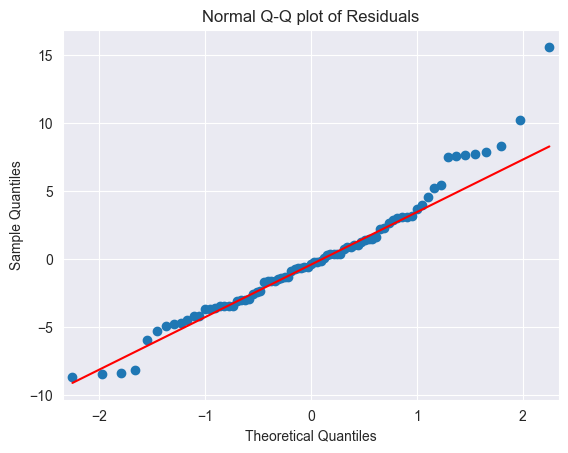

In [19]:
# Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [20]:
list(np.where(model.resid>10))

[array([ 0, 76])]

### Residual Plot for Homoscedasticity

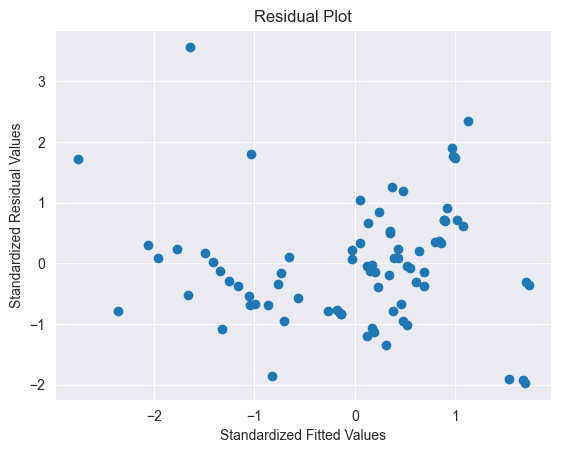

In [21]:
def get_standardised_values(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardised_values(model.fittedvalues), get_standardised_values(model.resid))
plt.title('Residual Plot')
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

### Residual vs Regressors

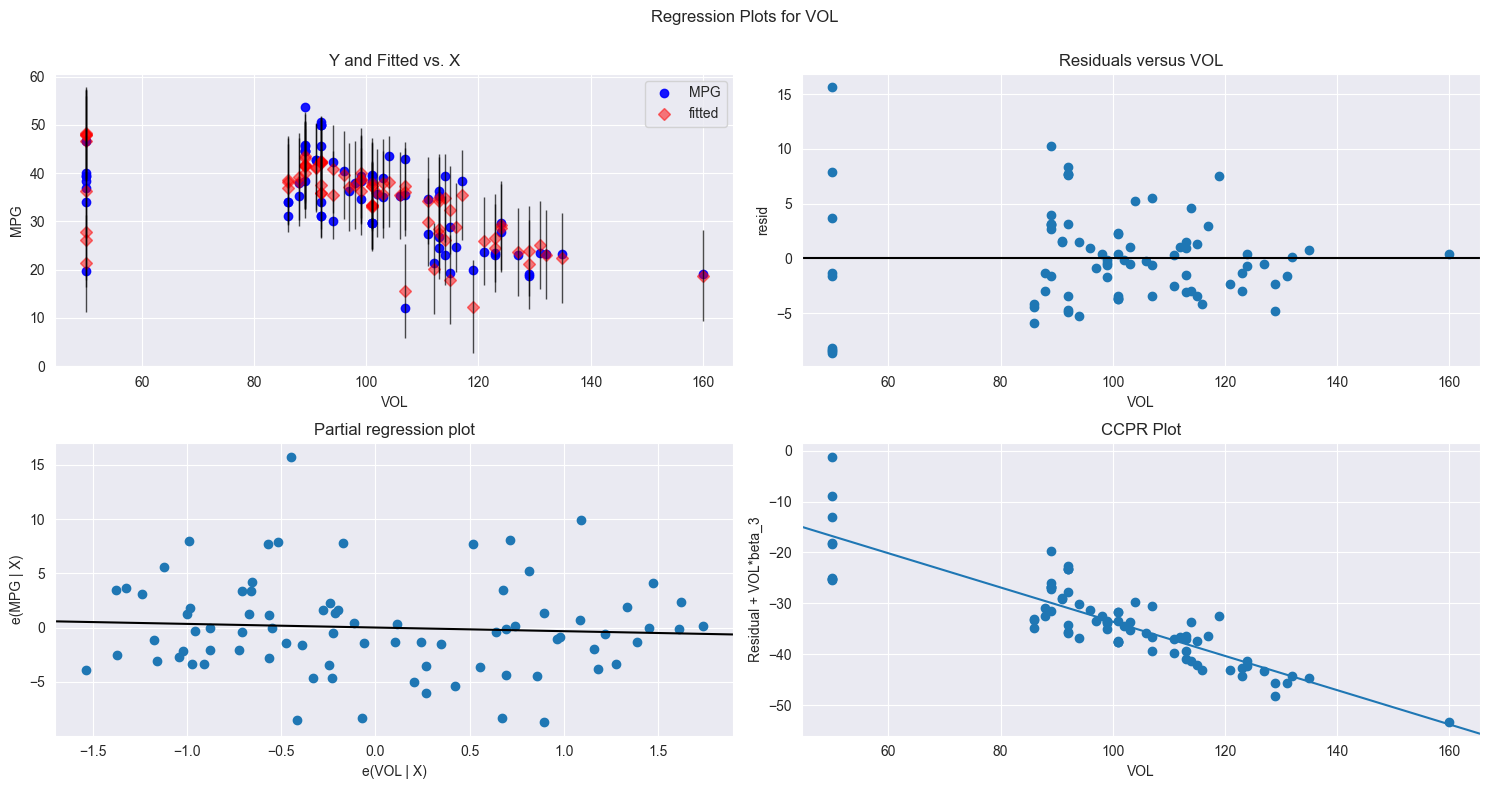

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

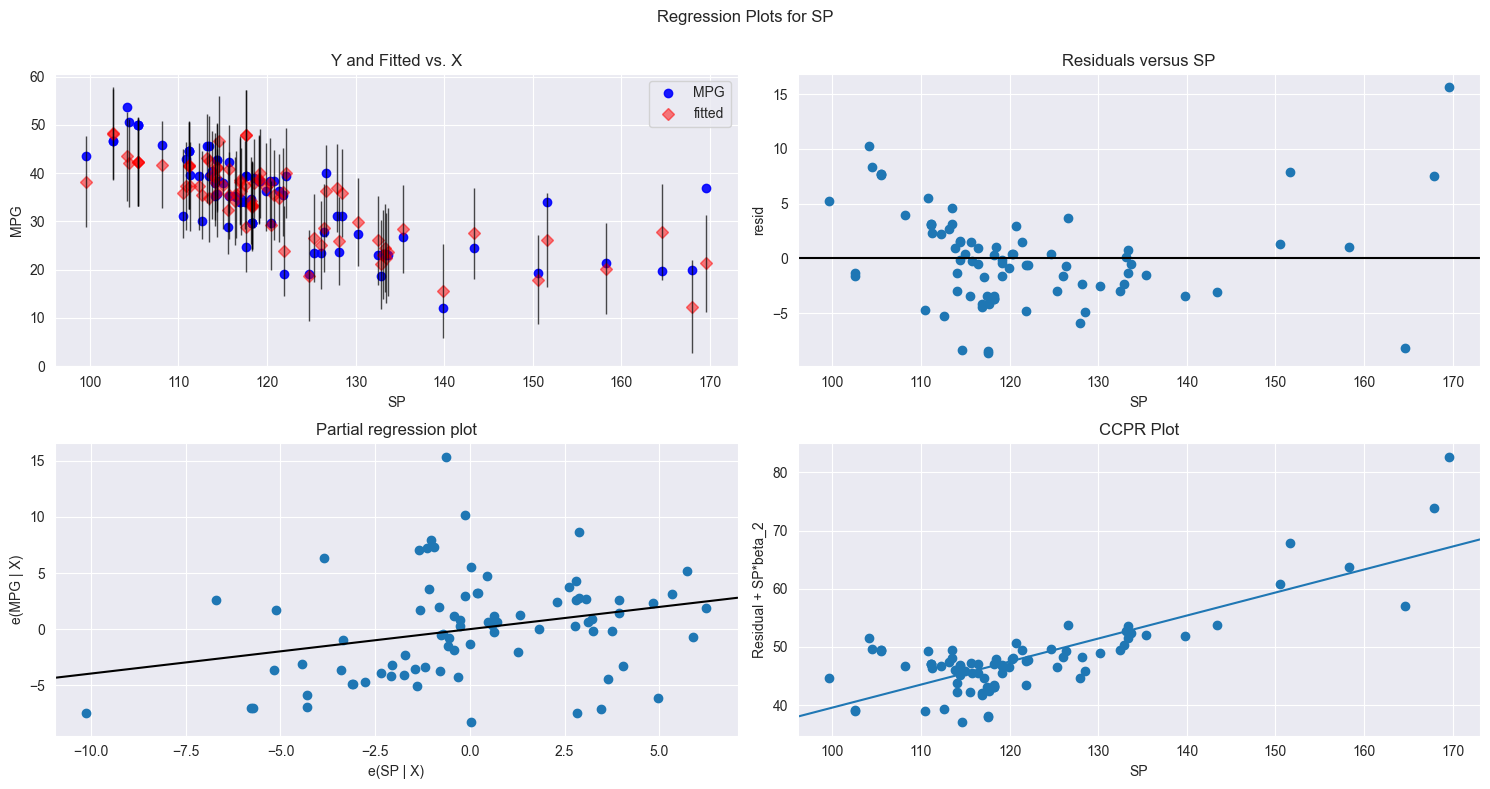

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

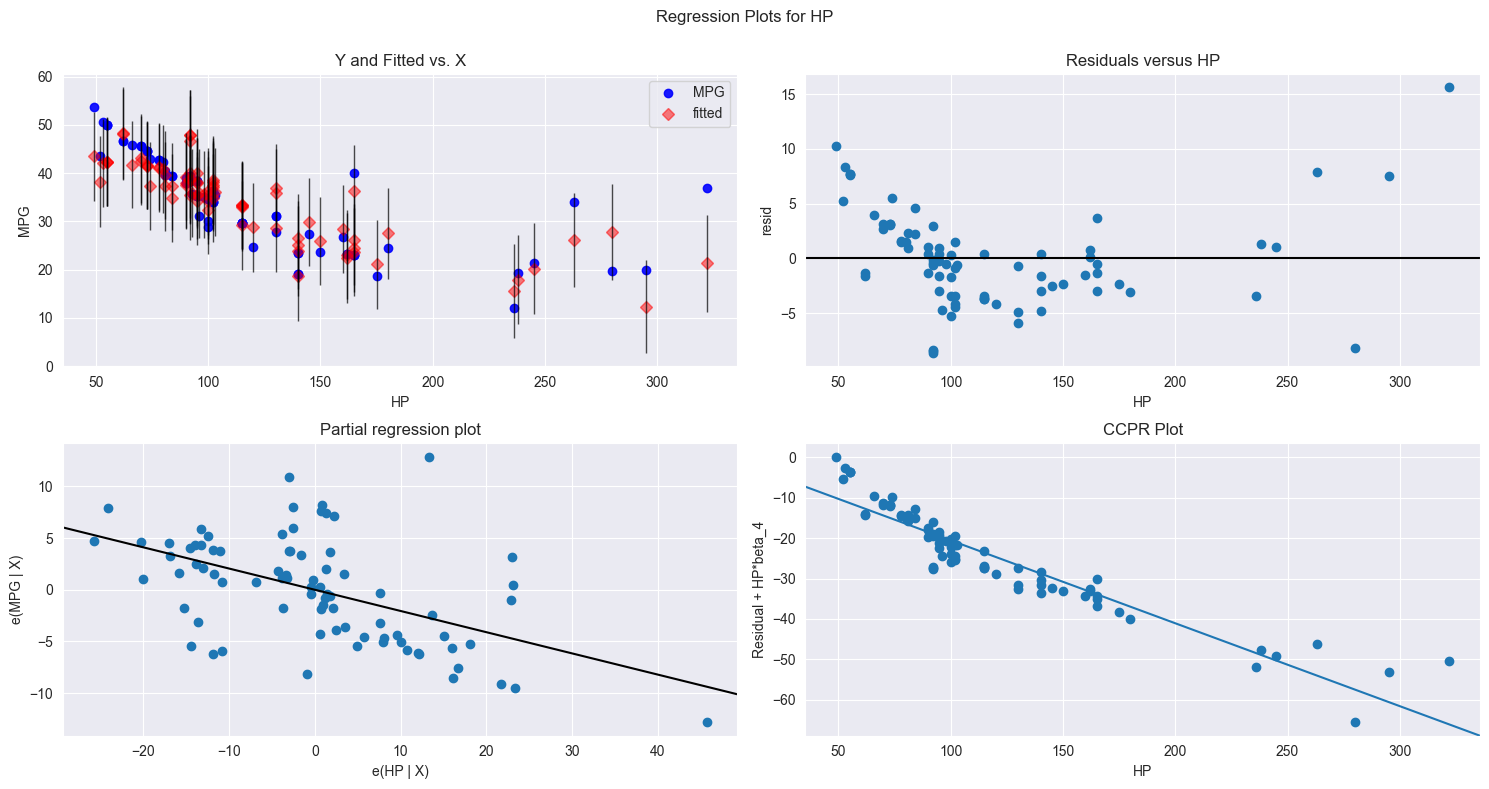

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

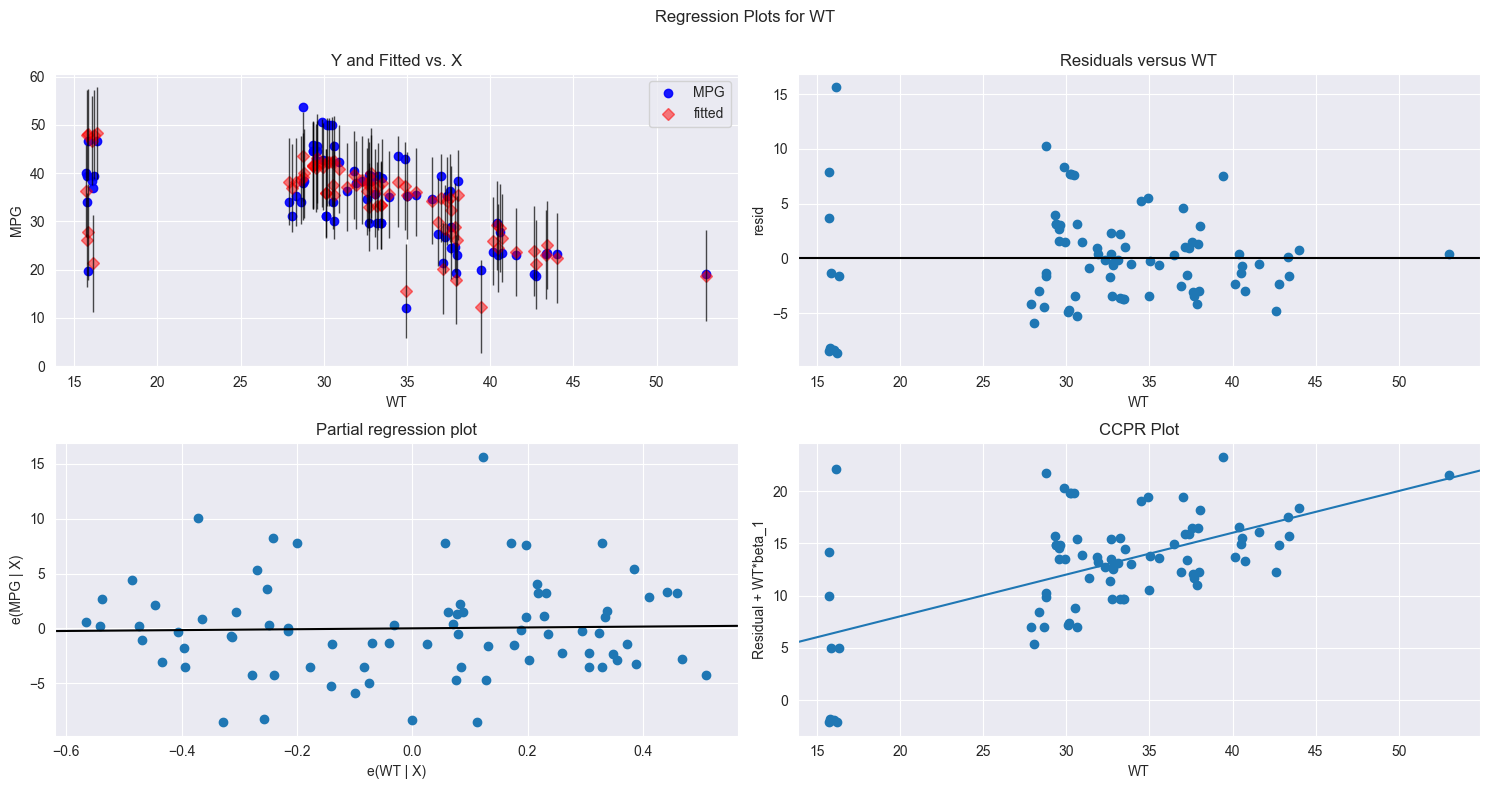

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

### Detecting Influencers / Outliers

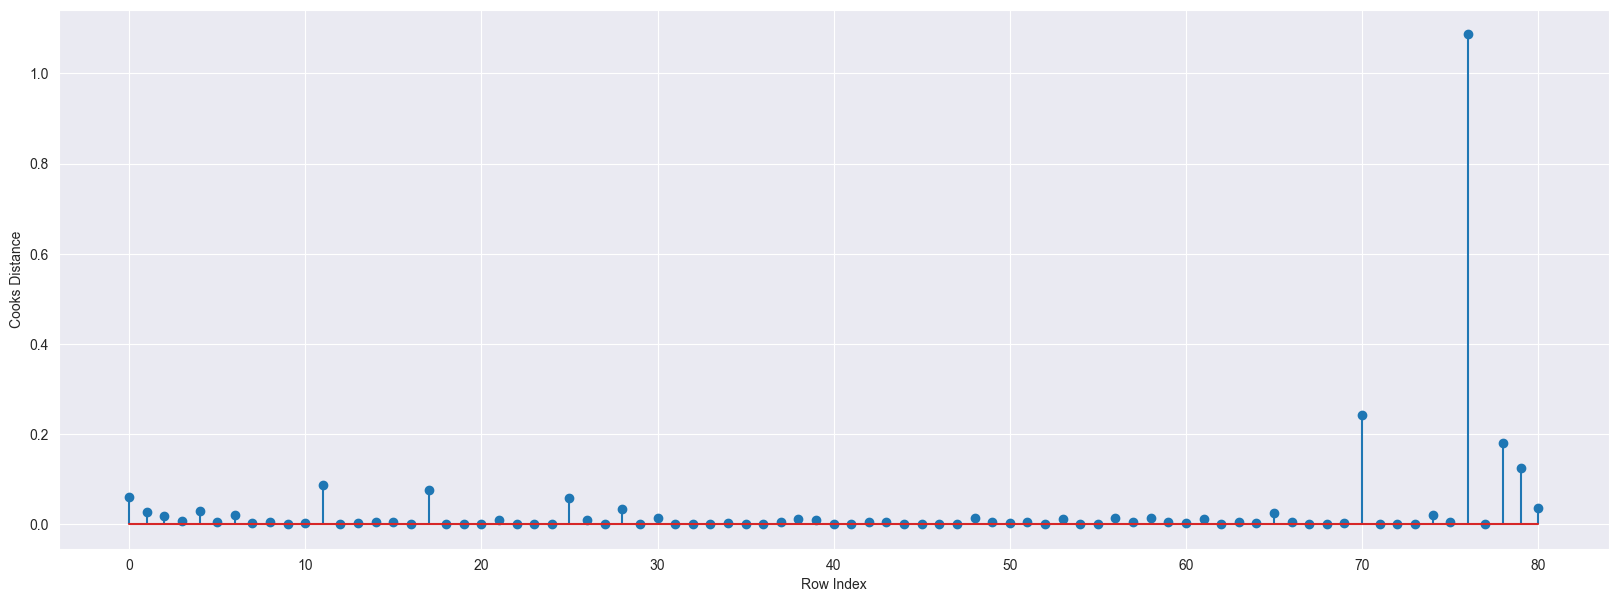

In [26]:
# Cook's Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
# index and value of influencer where c is more than .5
(np.argmax(c), np.max(c))

(np.int64(76), np.float64(1.0865193998179892))

### High Influence Points

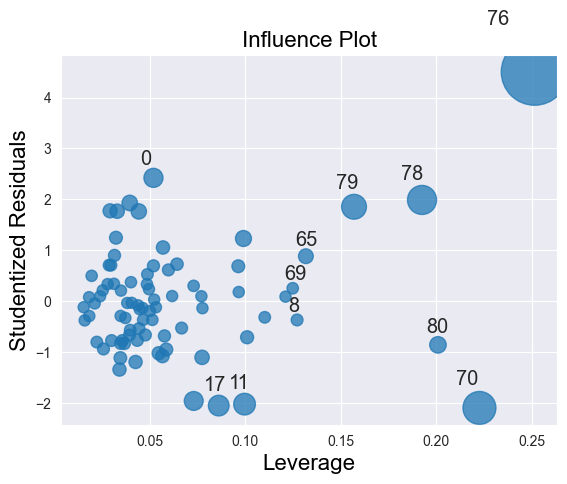

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
len(df)

81

In [30]:
k = 4
n = df.shape[0]
leverage_cutoff = 3 * ((k + 1)/n)
leverage_cutoff

0.18518518518518517

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [31]:
df[df.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [32]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


### Improving the Model

In [33]:
df_new = pd.read_csv('Datasets/Cars.csv')

In [34]:
# Discard the data points which are influencers and reassign the row number (reset_index())
df1 = df_new.drop(df_new.index[[70, 76]], axis=0).reset_index()

In [35]:
# Drop the Original Index
df1 = df1.drop(['index'], axis = 1)

In [36]:
df1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [37]:
final_model_ml_v = smf.ols('MPG~VOL+HP+SP', data=df1).fit()
final_model_ml_v.rsquared, final_model_ml_v.aic, final_model_ml_v.bic

(np.float64(0.8161692010376006),
 np.float64(446.11722639447726),
 np.float64(455.59501780434533))

In [38]:
final_model_ml_wt = smf.ols('MPG~WT+HP+SP', data=df1).fit()
final_model_ml_wt.rsquared, final_model_ml_wt.aic, final_model_ml_wt.bic

(np.float64(0.8160034320495304),
 np.float64(446.18843235750313),
 np.float64(455.6662237673712))

#### Comparing above R-Squares and AIC values, 'final_model_ml_v' has high R-Square value and low AIC value. Hence include variable 'VOL' so that multicollinearity problem would be solved.

### Cook's Distance

Text(0, 0.5, 'Cooks Distance')

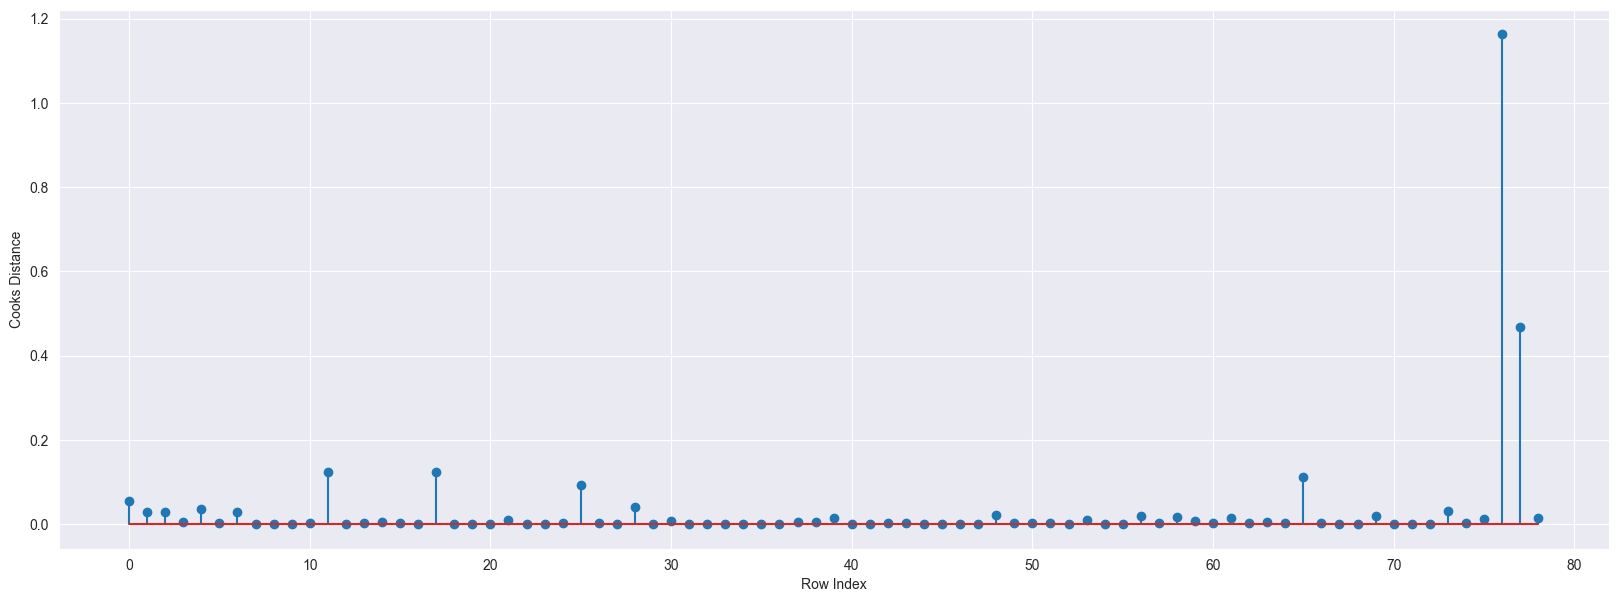

In [39]:
model_influence_v = final_model_ml_v.get_influence()
(c, _) = model_influence_v.cooks_distance

fig = plt.subplots(figsize = (20, 7))
plt.stem(np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel('Cooks Distance')

In [40]:
# index of the data point where c is greater than 0.5
(np.argmax(c), np.max(c))

(np.int64(76), np.float64(1.1629387469135337))

In [41]:
# Dropping 76
df2 = df1.drop(df1.index[[76]], axis=0).reset_index()

In [42]:
df2.shape

(78, 6)

In [43]:
df2 = df2.drop(['index'], axis = 1)

### Once again building the model

In [44]:
final_model = smf.ols('MPG~VOL+SP+HP', data=df2).fit()
final_model.rsquared, final_model.aic, final_model.bic

(np.float64(0.8426312723364439),
 np.float64(429.43791511771167),
 np.float64(438.86475042447006))

Text(0, 0.5, 'Cooks Distance')

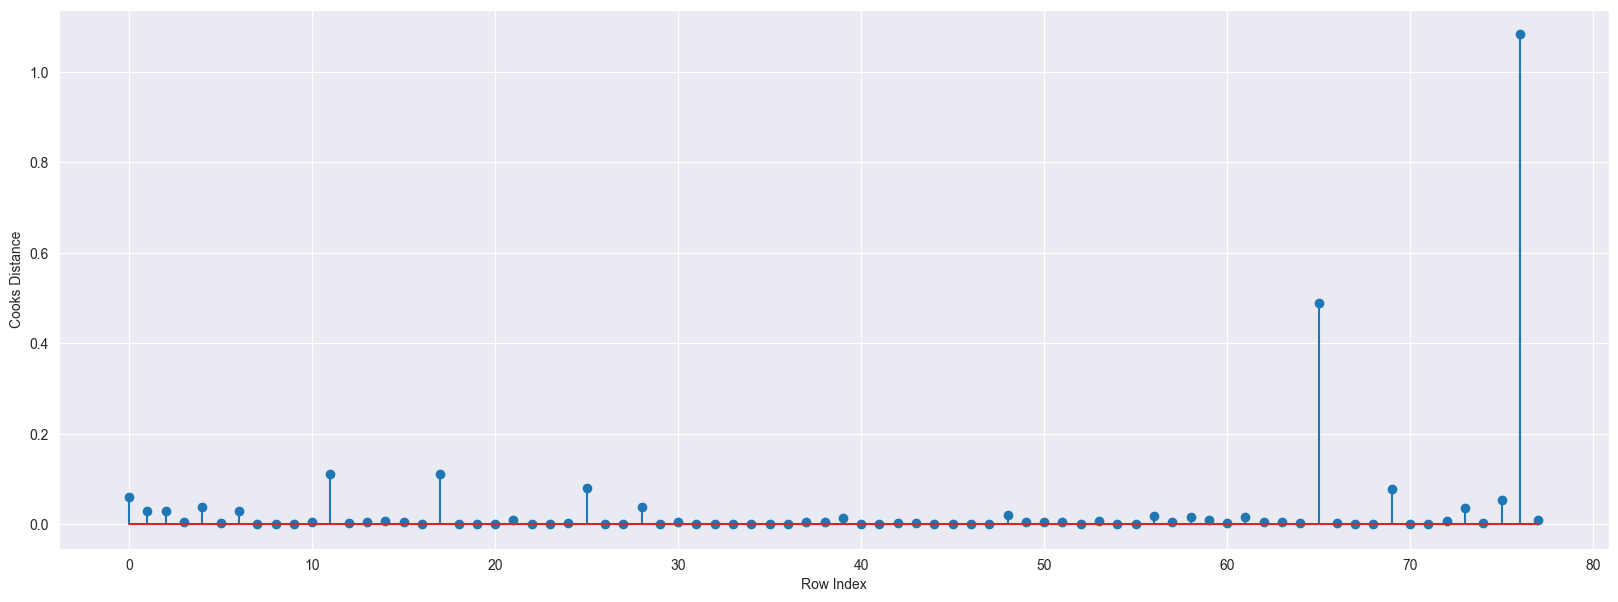

In [45]:
model_influence = final_model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize = (20, 7))
plt.stem(np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel('Cooks Distance')

In [46]:
# index of the data point where c is greater than 0.5
(np.argmax(c), np.max(c))

(np.int64(76), np.float64(1.0834592065958661))

In [47]:
df3 = df2.drop(df2.index[[76]], axis=0).reset_index()
df3 = df3.drop(['index'], axis = 1)

In [48]:
final_model = smf.ols('MPG~VOL+SP+HP', data=df3).fit()
final_model.rsquared, final_model.aic, final_model.bic

(np.float64(0.8669636111859063),
 np.float64(409.4153062719508),
 np.float64(418.79052795936553))

Text(0, 0.5, 'Cooks Distance')

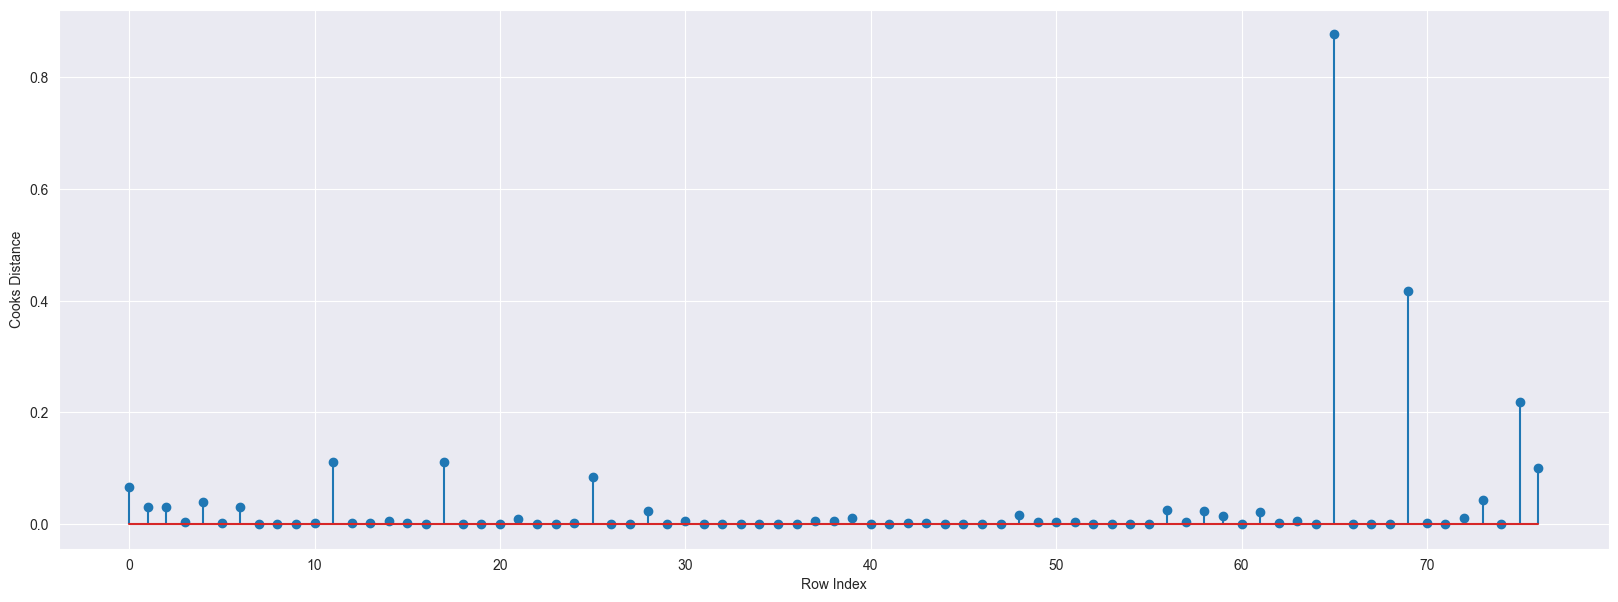

In [49]:
model_influence = final_model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.subplots(figsize = (20, 7))
plt.stem(np.round(c, 3))
plt.xlabel("Row Index")
plt.ylabel('Cooks Distance')

In [50]:
# checking the accuracy of the model
final_model = smf.ols('MPG~VOL+SP+HP', data=df3).fit()

In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           6.81e-32
Time:                        23:04:04   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
SP             0.4335      0.122      3.560      0.001       0.191       0.676
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
final_model.aic

np.float64(409.4153062719508)

### Predicting the new data

In [53]:
# new data for prediction
new_data = pd.DataFrame({'HP' : 40, 'VOL' : 95, 'SP' : 102, 'WT' : 35}, index=[1])

In [54]:
final_model.predict(new_data)

1    46.035594
dtype: float64

In [55]:
final_model.predict(df_new.iloc[0:5, :])

0    45.428872
1    43.992392
2    43.992392
3    43.508150
4    44.085858
dtype: float64

In [56]:
df_new['MPG'].head()

0    53.700681
1    50.013401
2    50.013401
3    45.696322
4    50.504232
Name: MPG, dtype: float64

In [57]:
y_pred = final_model.predict(df_new)

In [58]:
y_pred

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
76     7.165876
77    12.198598
78    14.908588
79     4.163958
80     9.161202
Length: 81, dtype: float64